In [18]:
%matplotlib qt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from ICARUS.Database import DB
from ICARUS.Airfoils.airfoil import Airfoil

from xfoil import XFoil
from xfoil.model import Airfoil as XFAirfoil
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np


In [3]:
# DB.load_data()

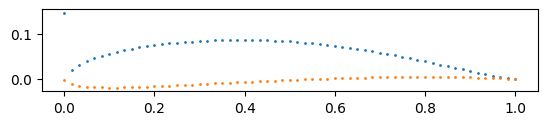

In [4]:
from ICARUS.Database import DB2D
import os

airf_root = DB.get_airfoil("S4062")
aorf_tip = DB.get_airfoil("S4320")

# # filename = os.path.join(DB2D, "S4062", 'S4062')
# # airf = Airfoil.load_from_file(filename)
airf_eta = Airfoil.morph_new_from_two_foils(
    airf_root, aorf_tip, 0.1, min(airf_root.n_points, aorf_tip.n_points)
)

# # airf.repanel(160)
airf_eta.plot(scatter=True)

# airf_root.plot()


In [23]:
airf_root._x_upper

array([1.0000e+00, 9.9671e-01, 9.8696e-01, 9.7107e-01, 9.4954e-01,
       9.2297e-01, 8.9200e-01, 8.5727e-01, 8.1936e-01, 7.7881e-01,
       7.3609e-01, 6.9165e-01, 6.4586e-01, 5.9909e-01, 5.5168e-01,
       5.0397e-01, 4.5626e-01, 4.0887e-01, 3.6217e-01, 3.1661e-01,
       2.7271e-01, 2.3092e-01, 1.9171e-01, 1.5550e-01, 1.2259e-01,
       9.3260e-02, 6.7690e-02, 4.6040e-02, 2.8430e-02, 1.4990e-02,
       5.7800e-03, 8.1000e-04, 6.1000e-04])

In [17]:
airf_root.y_upper(0)

array(0.16318639)

In [ ]:
# airf.repanel(500, distribution="cosine")
# Reynolds 1e5          3e5 5e5          1e6
xf = XFoil()
xf.Re = 1e6
xf.M = 0.0
pts = airf.selig
xpts = pts[0]
ypts = pts[1]
xf_airf_obj = XFAirfoil(x=xpts, y=ypts)
xf.airfoil = xf_airf_obj
xf.max_iter = 500
xf.xtr = (.2, 1.)
xf.n_crit = 9
xf.print = True
xf.filter()
xf.repanel(n_nodes=60)


aXF, clXF, cdXF, cmXF, cpXF = xf.aseq(0, -10, -1)
aXF, clXF, cdXF, cmXF, cpXF = xf.aseq(0, 12, 1)
dat = np.array([aXF, clXF, cdXF, cmXF], dtype=float).T
df: DataFrame = DataFrame(dat)

# Rename columns
df.columns = ["AoA", "CL", "CD", "Cm"]
df.set_index("AoA", inplace=True)


# Plor CL/CD
fig, ax = plt.subplots(2, 2)
aoa = df.index
df["CL/CD"] = df["CL"] / df["CD"]

ax[0,0].plot(aoa, df["CL/CD"], label="CL/CD")
ax[0,0].set_xlabel("AoA")
ax[0,0].set_ylabel("CL/CD")

ax[0,1].plot(aoa, df["CL"], label="CL")
ax[0,1].set_xlabel("AoA")
ax[0,1].set_ylabel("CL")

ax[1,0].plot(aoa, df["CD"], label="CD")
ax[1,0].set_xlabel("AoA")
ax[1,0].set_ylabel("CD")

ax[1,1].plot(aoa, df["Cm"], label="Cm")
ax[1,1].set_xlabel("AoA")
ax[1,1].set_ylabel("Cm")